In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller  # For stationarity check
from pmdarima import auto_arima  # For ARIMA model selection
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For plotting ACF/PACF
import warnings

In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
data.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [8]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [10]:
data.size

17000

In [11]:
data.shape

(1000, 17)

In [12]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [13]:
# Aggregate total sales by date
daily_sales = data.groupby('Date').agg({'Total': 'sum'}).reset_index()
daily_sales.set_index('Date', inplace=True)

# ----- Check for Stationarity -----

In [14]:
# Perform the Augmented Dickey-Fuller (ADF) test to check stationarity
result = adfuller(daily_sales['Total'])

In [15]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -7.654895726803343
p-value: 1.7495640309589597e-11


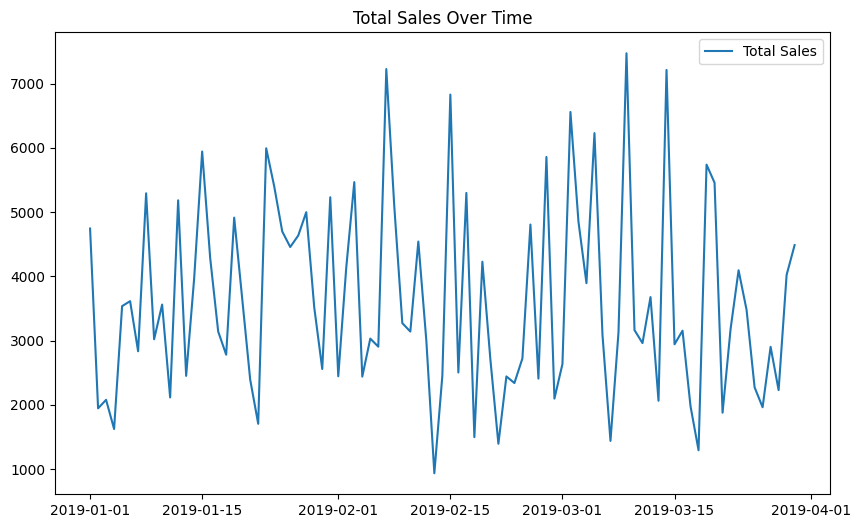

In [16]:
# A p-value < 0.05 indicates that the data is stationary.
# Plot the time series to visually inspect the trend and stationarity.
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Total'], label='Total Sales')
plt.title('Total Sales Over Time')
plt.legend()
plt.show()

# ----- Make the Data Stationary (if necessary) -----

In [17]:
# If the data is not stationary (p-value > 0.05), difference the data
if result[1] > 0.05:
    daily_sales_diff = daily_sales['Total'].diff().dropna()

    # Plot differenced data
    plt.figure(figsize=(10, 6))
    plt.plot(daily_sales_diff, label='Differenced Total Sales')
    plt.title('Differenced Total Sales Over Time')
    plt.legend()
    plt.show()

    # Re-run the ADF test on the differenced data
    result_diff = adfuller(daily_sales_diff)
    print('ADF Statistic (differenced):', result_diff[0])
    print('p-value (differenced):', result_diff[1])
else:
    daily_sales_diff = daily_sales['Total']

# ----- Choosing ARIMA Parameters -----

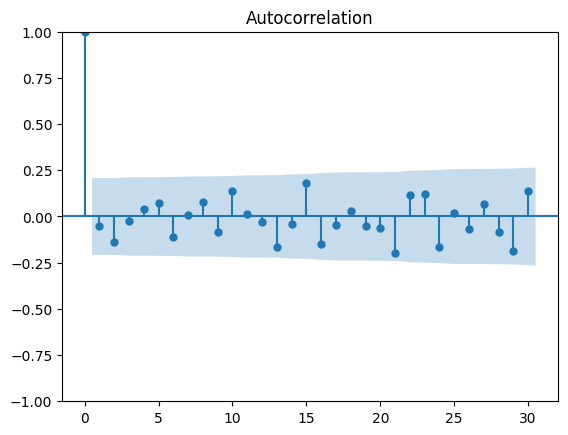

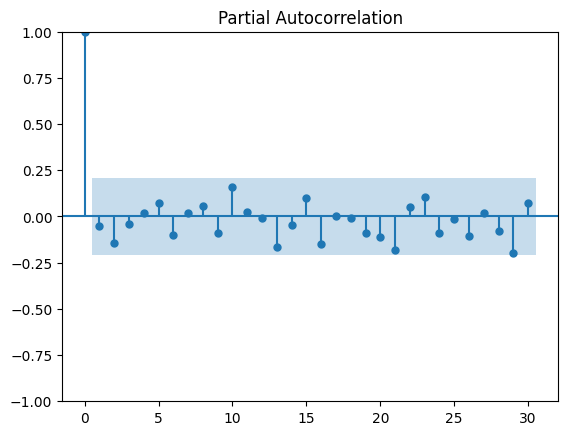

In [18]:
# Plot the ACF and PACF for manual selection of p and q
plot_acf(daily_sales_diff, lags=30)
plt.show()

plot_pacf(daily_sales_diff, lags=30)
plt.show()

# ----- Build the ARIMA Model -----

In [19]:
# Use auto_arima to automatically select the best (p, d, q) parameters
arima_model = auto_arima(daily_sales['Total'], 
                         seasonal=False,  # No seasonality
                         stepwise=True,   # Stepwise search for best parameters
                         suppress_warnings=True)

In [20]:
# Print the model summary with best p, d, q values
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   89
Model:                        SARIMAX   Log Likelihood                -778.284
Date:                Sun, 15 Sep 2024   AIC                           1560.569
Time:                        11:08:18   BIC                           1565.546
Sample:                    01-01-2019   HQIC                          1562.575
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3628.8399    181.728     19.969      0.000    3272.660    3985.020
sigma2      2.307e+06   4.37e+05      5.284      0.000    1.45e+06    3.16e+06
Ljung-Box (L1) (Q):                   0.23   Jarque-

In [21]:
# Fit the model on the original data
arima_model.fit(daily_sales['Total'])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

# ----- Forecasting -----

In [22]:
# Forecast the next 30 days
n_periods = 30
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

In [23]:
# Create a dataframe for the forecasted values
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=n_periods)
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

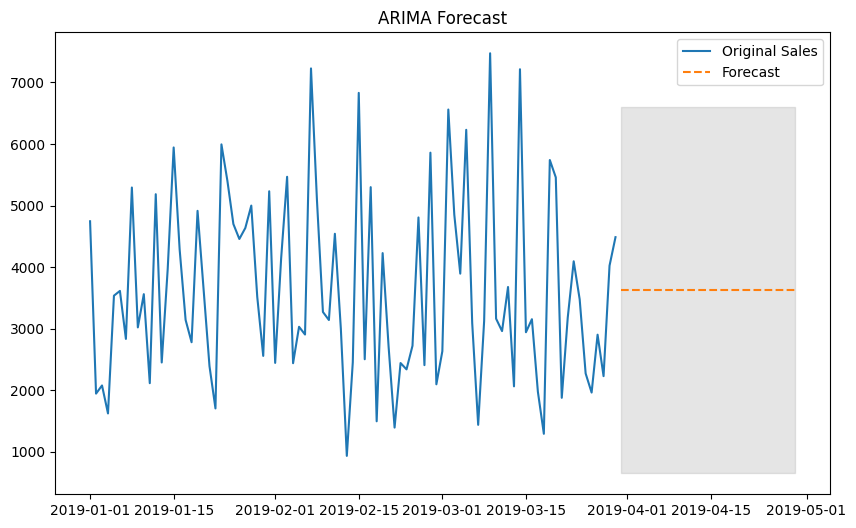

In [24]:
# Plot the original sales and the forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Total'], label='Original Sales')
plt.plot(forecast_df['Forecast'], label='Forecast', linestyle='--')
plt.fill_between(forecast_df.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.title('ARIMA Forecast')
plt.legend()
plt.show()